In [1]:
# required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# read data and crate dataset
fake = pd.read_csv('../data/Fake.csv')
true = pd.read_csv('../data/True.csv')

# assign labels
fake['class'] = 1
true['class'] = 0

df = pd.concat([true,fake])

# top 5 rows
df.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [5]:
# bottom 5 rows
df.tail()

,title,text,subject,date,class
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


In [6]:
df.shape

(44898, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


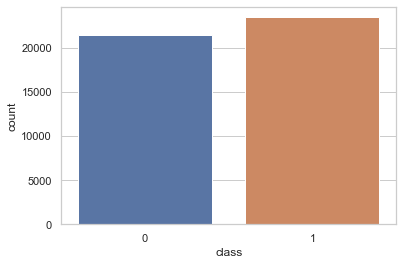

In [8]:
sns.set_theme(style="whitegrid")
sns.countplot(x = 'class', data = df);

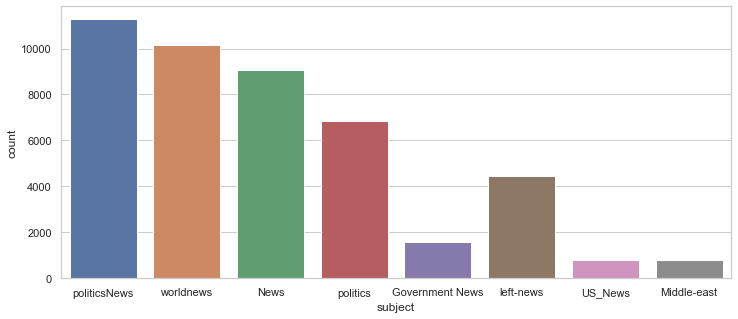

In [18]:
plt.figure(figsize=(12, 5))
sns.countplot(x = 'subject', data = df);

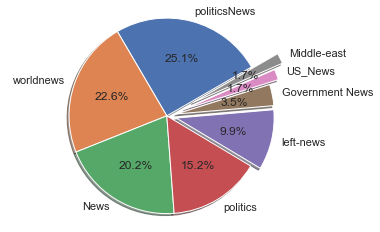

In [25]:
labels = 'politicsNews', 'worldnews', 'News', 'politics', 'left-news','Government News', 'US_News', 'Middle-east'
explode = (0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.2, 0.3)

fig1, ax1 = plt.subplots()
ax1.pie(df['subject'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal');

In [27]:
# combining 'title'and 'text'
df['full_text'] = df['title'] + ' ' + df['text']
df.drop(['title', 'text', 'subject', 'date'], axis = 1, inplace=True)
df.head()

,class,full_text
0,0,"As U.S. budget fight looms, Republicans flip t..."
1,0,U.S. military to accept transgender recruits o...
2,0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,0,FBI Russia probe helped by Australian diplomat...
4,0,Trump wants Postal Service to charge 'much mor...


### Let's check the length of the texts.

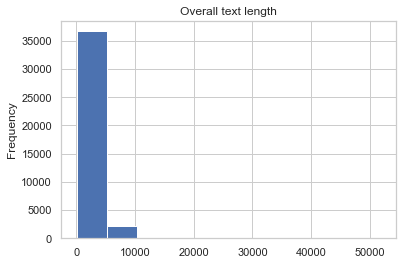

In [28]:
text_length = df['full_text'].drop_duplicates().apply(len)
text_length.plot(kind='hist')
plt.title('Overall text length');

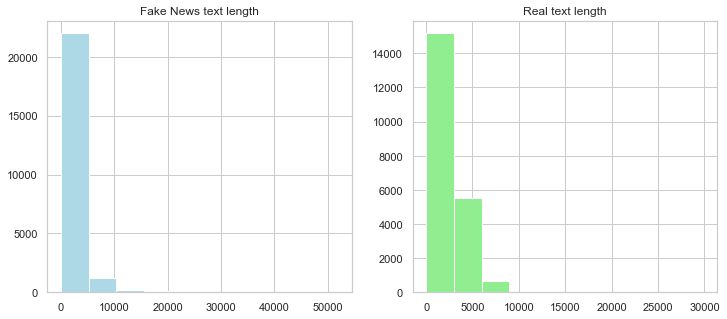

In [30]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
text_len=df[df['class']==1]['full_text'].apply(len)
ax1.hist(text_len,color='lightblue')
ax1.set_title('Fake News texts length')
text_len=df[df['class']==0]['full_text'].apply(len)
ax2.hist(text_len,color='lightgreen')
ax2.set_title('Real texts length');

### Let's check the word count of the texts.

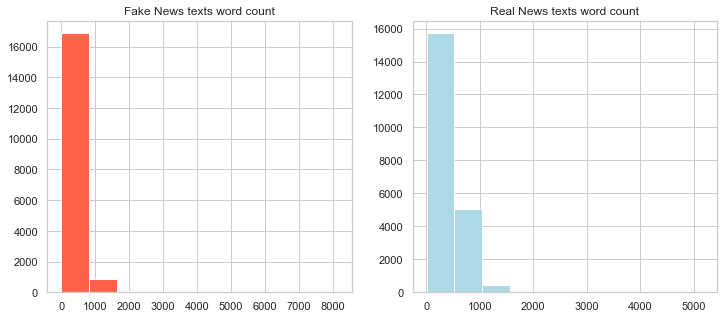

In [31]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
text_len=df[df['class']==1]['full_text'].drop_duplicates().str.split().map(lambda x: len(x))
ax1.hist(text_len,color='tomato')
ax1.set_title('Fake News texts word count')
text_len=df[df['class']==0]['full_text'].drop_duplicates().str.split().map(lambda x: len(x))
ax2.hist(text_len,color='lightblue')
ax2.set_title('Real News texts word count');

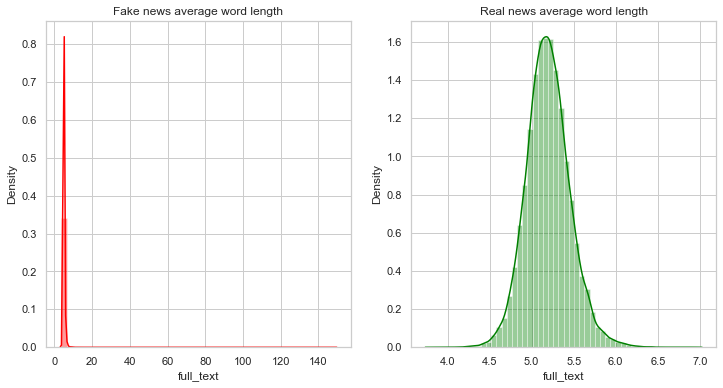

In [32]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
word=df[df['class']==1]['full_text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Fake news average word length')
word=df[df['class']==0]['full_text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Real news average word length');

# Ngram

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None, remove_stop_words=False, n_words=1): 
    
    if remove_stop_words:
        vec = CountVectorizer(stop_words = 'english', ngram_range=(n_words, n_words)).fit(corpus)
    else:
        vec = CountVectorizer(ngram_range=(n_words, n_words)).fit(corpus)
        
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def plot_ngram(words, color = "#120f7a"):
    
    fig = plt.figure(figsize=(12,6))
    df = pd.DataFrame(words, columns = ['text' , 'count'])
    ax1 = df.groupby('text').sum()['count'].sort_values(ascending=False).plot(
        kind='bar', color = color)

### Unigrams

In [35]:
unigram_words = get_top_n_words(df['full_text'], 20, remove_stop_words=True, n_words=1)
for word, freq in unigram_words:
    print(word, freq)

trump 148899
said 133033
president 57559
people 42473
state 35612
new 33091
obama 31450
clinton 30489
house 29754
reuters 29565
donald 29033
government 28676
states 27137
republican 26633
just 26402
year 25424
white 24438
united 23729
told 23567
like 23189


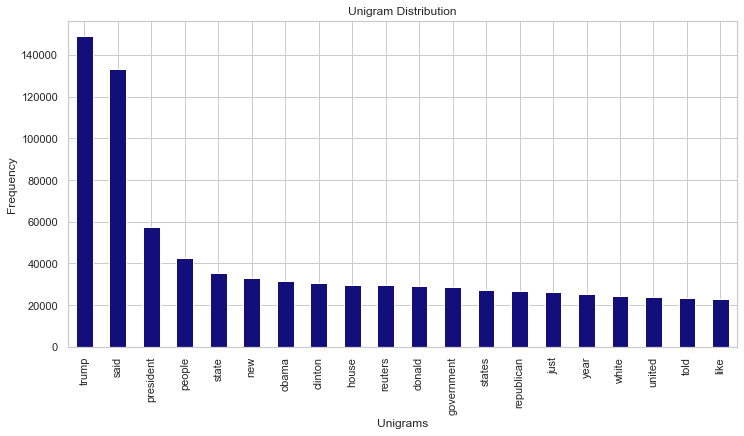

In [36]:
plot_ngram(unigram_words)
plt.title('Unigram Distribution')
plt.xlabel("Unigrams")
plt.ylabel("Frequency");

### Bigrams

In [39]:
bigram_words = get_top_n_words(df['full_text'], 20, remove_stop_words=True, n_words=2)
for word, freq in bigram_words:
    print(word, freq)

donald trump 27315
united states 18931
white house 16300
hillary clinton 10238
new york 9310
featured image 7693
north korea 7375
president donald 7003
washington reuters 6678
twitter com 6567
pic twitter 6195
barack obama 5782
year old 5120
president trump 5118
trump said 5099
prime minister 4826
supreme court 4707
said statement 4544
fox news 4471
president obama 4440


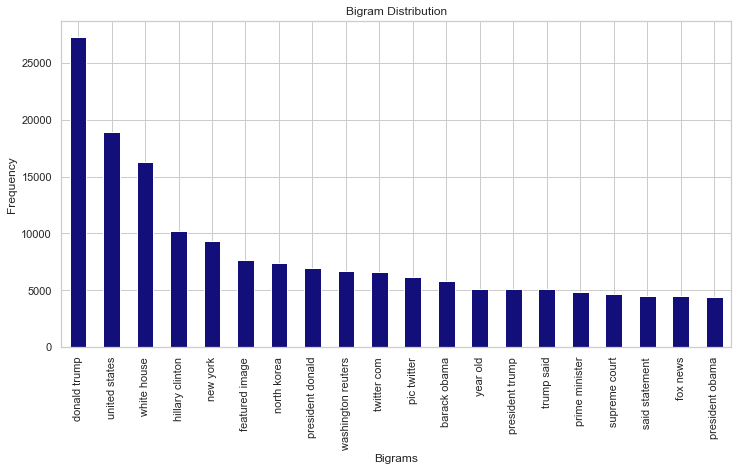

In [38]:
plot_ngram(bigram_words)
plt.title('Bigram Distribution')
plt.xlabel("Bigrams")
plt.ylabel("Frequency");

### Trigrams

In [40]:
trigram_words = get_top_n_words(df['full_text'], 20, remove_stop_words=True, n_words=3)
for word, freq in trigram_words:
    print(word, freq)

president donald trump 6932
pic twitter com 6148
president barack obama 3902
new york times 2164
21st century wire 1926
donald trump realdonaldtrump 1790
reuters president donald 1564
washington reuters president 1532
black lives matter 1518
president united states 1203
elect donald trump 1153
president elect donald 1117
white house said 1056
new york city 1054
president vladimir putin 982
news 21st century 957
national security adviser 922
affordable care act 910
director james comey 891
speaker paul ryan 864


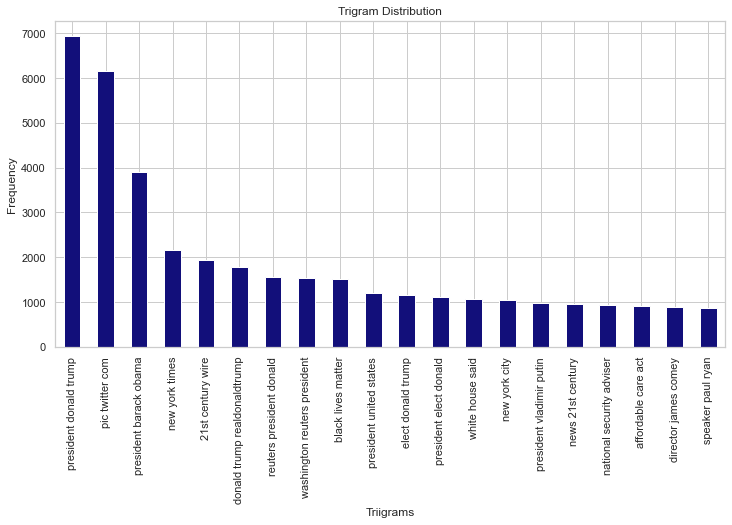

In [41]:
plot_ngram(trigram_words)
plt.title('Trigram Distribution')
plt.xlabel("Trigrams")
plt.ylabel("Frequency");

## Wordcloud

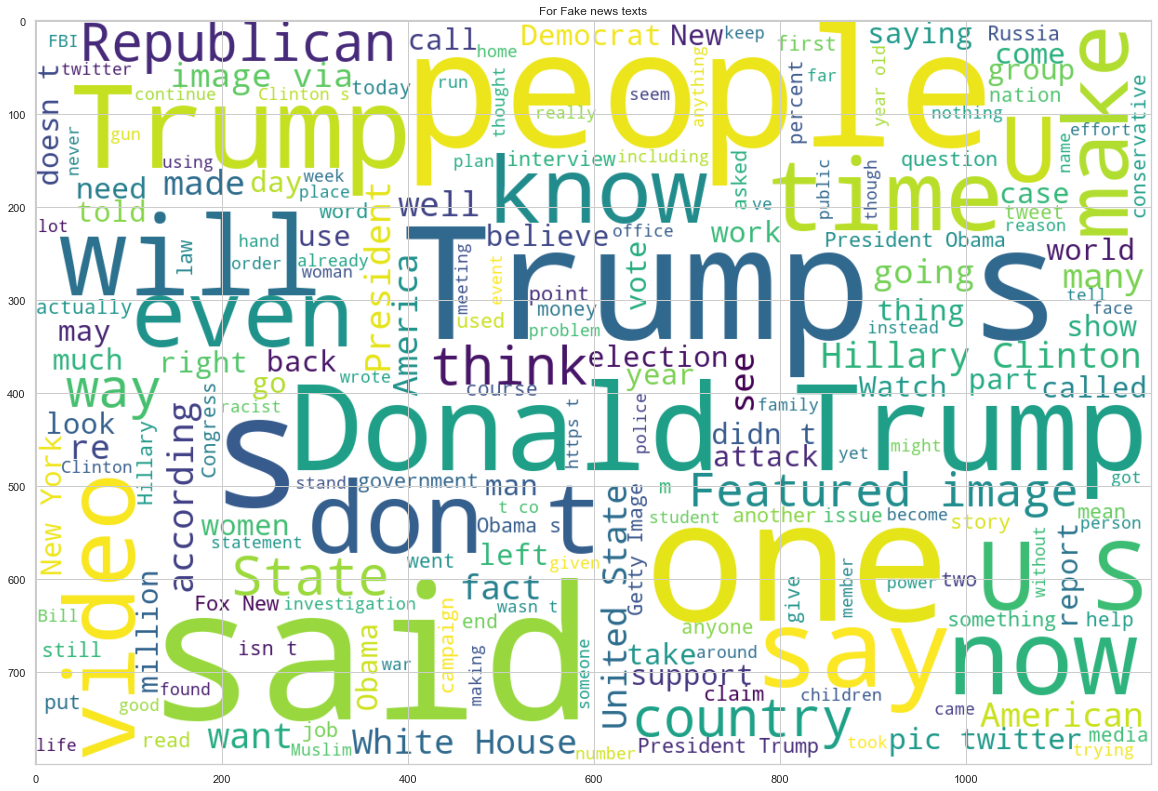

In [42]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(
        max_font_size=200,
        max_words=200,
        width=1200,
        height=800,
        background_color="white",
    ).generate(" ".join(df[df['class'] == 1].full_text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('For Fake news texts');

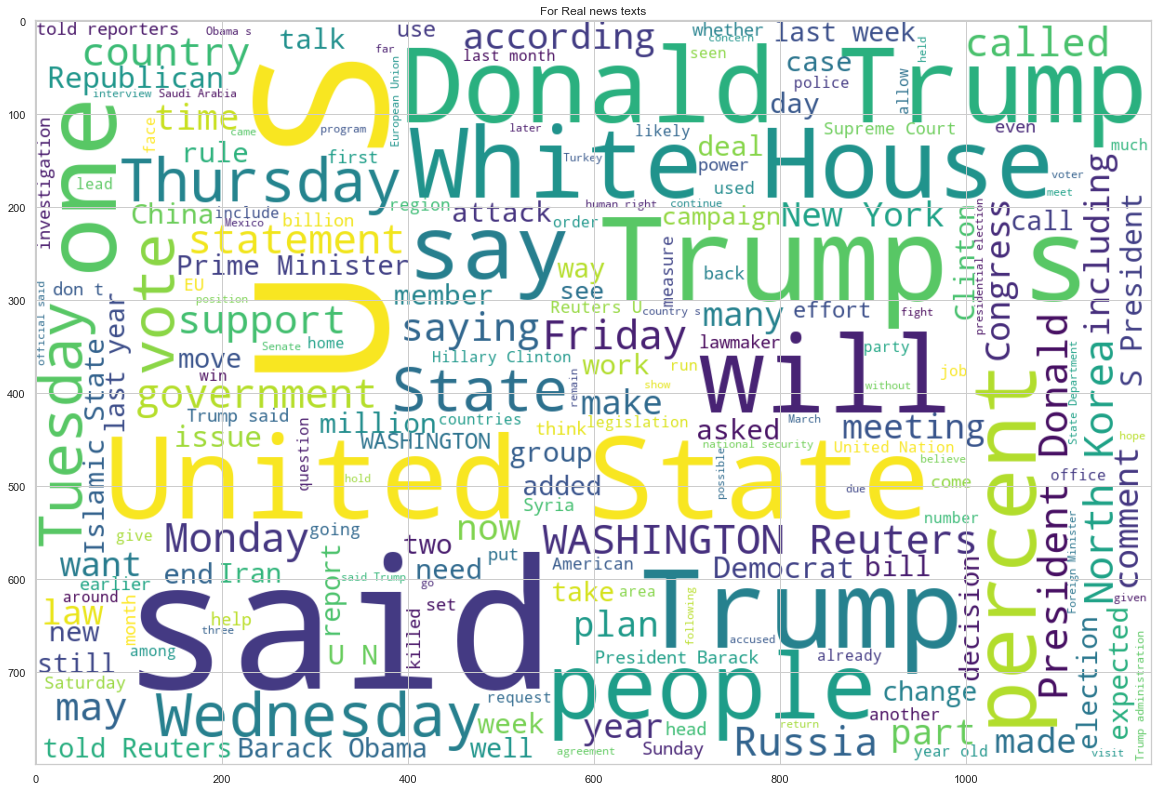

In [43]:
plt.figure(figsize = (20,20))
wc = WordCloud(
        max_font_size=200,
        max_words=200,
        width=1200,
        height=800,
        background_color="white",
    ).generate(" ".join(df[df['class'] == 0].full_text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('For Real news texts');